<a href="https://colab.research.google.com/github/Shilpa-shilu-03/Bank_Customer_Churn/blob/main/Bank_Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bank Customers Churn Prediction**

#**Aim** - Predict the Customer Churn for a Bank.

# **About Dataset**

 Customer churn refers to the phenomenon where customers discontinue their relationship with a company or stop using its products or services. Understanding the factors that contribute to churn is crucial for businesses to retain customers and maintain long-term profitability.

 The dataset used in this analysis contains information about bank customers, including their demographic details, credit score, account balance, tenure, and various other features. The target variable is "Exited," which indicates whether a customer has churned (1) or not (0).

This dataset contains the data of a bank with following columns:


1. RowNumber : unused variable
2. customer_id : unused variable.
3. Surname : unused variable
4. credit_score : used as input.
5. Geography : used as input.
6. gender : used as input.
7. age : used as input.
8. tenure : used as input.
9. balance : used as input.
10. products_number : used as input.
11. has_credit_card : used as input.
12. active_member : used as input.
13. estimated_salary : used as input.
14. Complain : used as input
15. Satisfaction Score : used as input
16. Card Type : used as input
17. Point Earned : used as input
18. Exited : used as the target. 1 if the client has left the bank during some period or 0 if he/she has not.

#1. Importing required libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from lightgbm import LGBMClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest,chi2



#2. Loading Dataset



In [3]:
df=pd.read_csv('/content/Customer-Churn-Records.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339


# 3. Exploratory Data Analysis

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [5]:
df.drop(['RowNumber','Surname'],axis=1,inplace=True)
df

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CustomerId          10000 non-null  int64  
 1   CreditScore         10000 non-null  int64  
 2   Geography           10000 non-null  object 
 3   Gender              10000 non-null  object 
 4   Age                 10000 non-null  int64  
 5   Tenure              10000 non-null  int64  
 6   Balance             10000 non-null  float64
 7   NumOfProducts       10000 non-null  int64  
 8   HasCrCard           10000 non-null  int64  
 9   IsActiveMember      10000 non-null  int64  
 10  EstimatedSalary     10000 non-null  float64
 11  Exited              10000 non-null  int64  
 12  Complain            10000 non-null  int64  
 13  Satisfaction Score  10000 non-null  int64  
 14  Card Type           10000 non-null  object 
 15  Point Earned        10000 non-null  int64  
dtypes: fl

In [7]:
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


In [8]:
df.isna().sum()

CustomerId            0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

In [9]:
df.dtypes

CustomerId              int64
CreditScore             int64
Geography              object
Gender                 object
Age                     int64
Tenure                  int64
Balance               float64
NumOfProducts           int64
HasCrCard               int64
IsActiveMember          int64
EstimatedSalary       float64
Exited                  int64
Complain                int64
Satisfaction Score      int64
Card Type              object
Point Earned            int64
dtype: object

In [10]:
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

Number of rows: 10000
Number of columns: 16


In [11]:
df.columns

Index(['CustomerId', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited', 'Complain', 'Satisfaction Score',
       'Card Type', 'Point Earned'],
      dtype='object')

In [12]:
df.count()

CustomerId            10000
CreditScore           10000
Geography             10000
Gender                10000
Age                   10000
Tenure                10000
Balance               10000
NumOfProducts         10000
HasCrCard             10000
IsActiveMember        10000
EstimatedSalary       10000
Exited                10000
Complain              10000
Satisfaction Score    10000
Card Type             10000
Point Earned          10000
dtype: int64

In [13]:
df.drop(['CustomerId'],axis=1,inplace=True)

In [14]:
df['Exited'].value_counts()

0    7962
1    2038
Name: Exited, dtype: int64

In [15]:
def detect_outliers_iqr_feature(data,feature):
  feature_data=data[feature]
  Q1=np.percentile(feature_data,25)
  Q3=np.percentile(feature_data,75)
  iqr=Q3-Q1
  lower_bound=Q1-1.5*iqr
  upperbound=Q3+1.5*iqr

  outliers=np.where((feature_data<lower_bound)|(feature_data>upperbound))[0]

In [16]:
feature_name=['CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Complain','Satisfaction Score','Point Earned']
for i in feature_name:
  outliers=detect_outliers_iqr_feature(df,i)
  print("Outliers are present in",i,":",outliers)

Outliers are present in CreditScore : None
Outliers are present in Age : None
Outliers are present in Tenure : None
Outliers are present in Balance : None
Outliers are present in NumOfProducts : None
Outliers are present in HasCrCard : None
Outliers are present in IsActiveMember : None
Outliers are present in EstimatedSalary : None
Outliers are present in Complain : None
Outliers are present in Satisfaction Score : None
Outliers are present in Point Earned : None


#4. Data Visualization

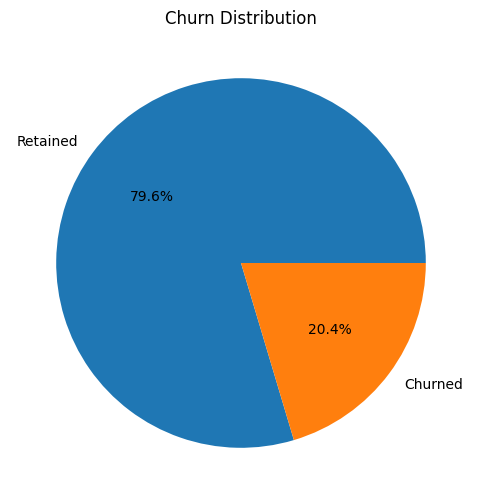

In [17]:
# Churn distribution

plt.figure(figsize=(6, 6))
a=df['Exited'].value_counts()
labels=['Retained','Churned']
plt.pie(a,labels=labels, autopct='%1.1f%%')
plt.title('Churn Distribution')
plt.show()

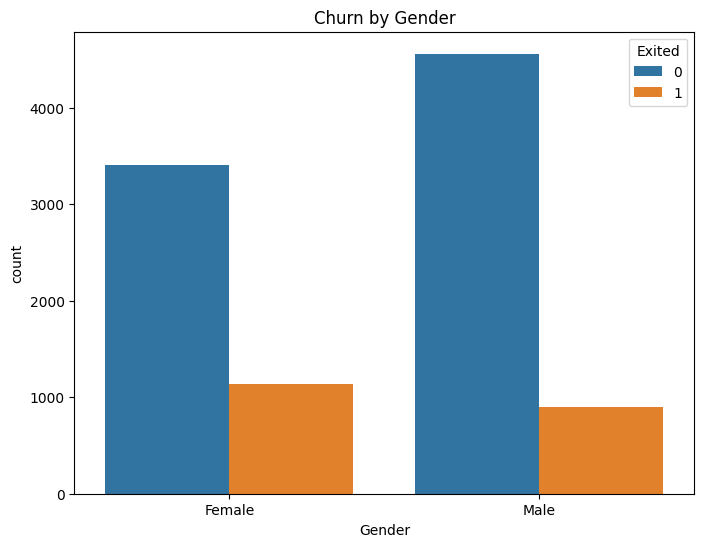

In [18]:
# Churn by gender

plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', hue='Exited', data=df)
plt.title('Churn by Gender')
plt.show()

In [19]:
churn_rate_Gender = df.groupby('Gender')['Exited'].mean()
print(churn_rate_Gender)

Gender
Female    0.250715
Male      0.164743
Name: Exited, dtype: float64


The churn rate is higher for female customers compared to male customers. This indicates that gender may play a role in customer churn.

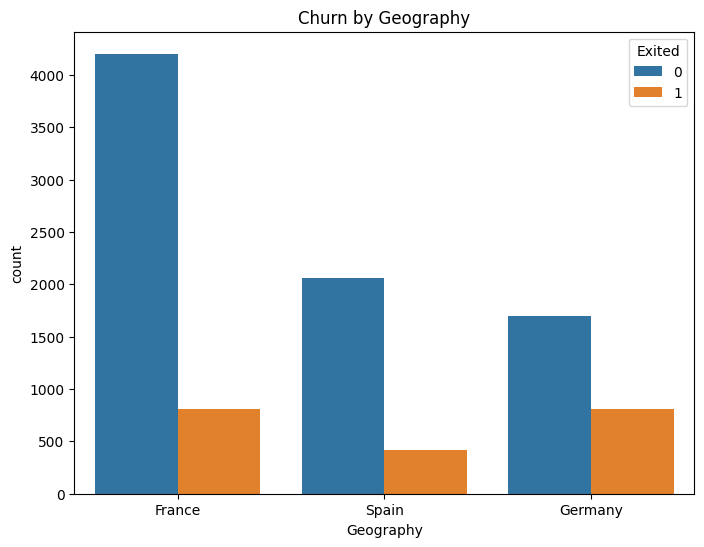

In [20]:
# Churn by geography

plt.figure(figsize=(8, 6))
sns.countplot(x='Geography', hue='Exited', data=df)
plt.title('Churn by Geography')
plt.show()

In [21]:
churn_rate_Geography = df.groupby('Geography')['Exited'].mean()
print(churn_rate_Geography)

Geography
France     0.161747
Germany    0.324432
Spain      0.166734
Name: Exited, dtype: float64


The churn rate varies across different countries. Germany has the highest churn rate, followed by Spain and France. This suggests that geographic location may impact customer churn.

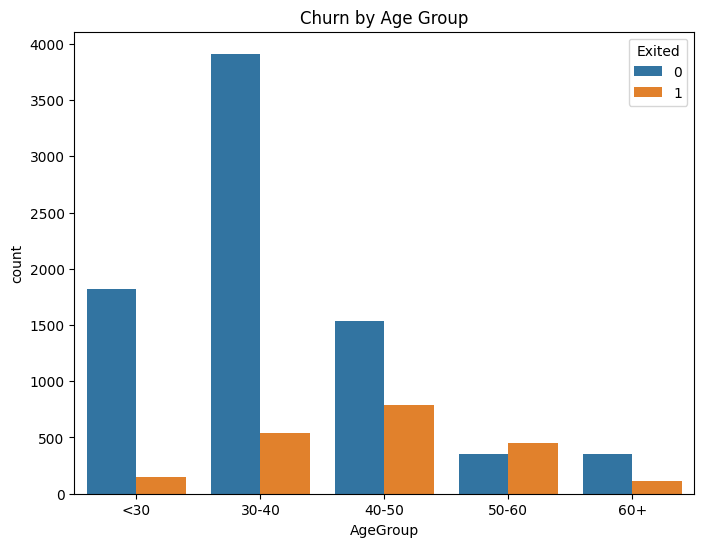

In [22]:
# Churn by age group

df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 30, 40, 50, 60, np.inf], labels=['<30', '30-40', '40-50', '50-60', '60+'])
plt.figure(figsize=(8, 6))
sns.countplot(x='AgeGroup', hue='Exited', data=df)
plt.title('Churn by Age Group')
plt.show()

In [23]:
churn_rate_AgeGroup = df.groupby('AgeGroup')['Exited'].mean()
print(churn_rate_AgeGroup)

AgeGroup
<30      0.075203
30-40    0.121096
40-50    0.339655
50-60    0.562108
60+      0.247845
Name: Exited, dtype: float64


Age group strongly influences churn rate. The highest churn rate is observed in the 50-60 age group, followed by the 40-50 age group. The lowest churn rate is observed in the <30 age group. This implies that older customers are more likely to churn, while younger customers are more likely to stay with the bank.

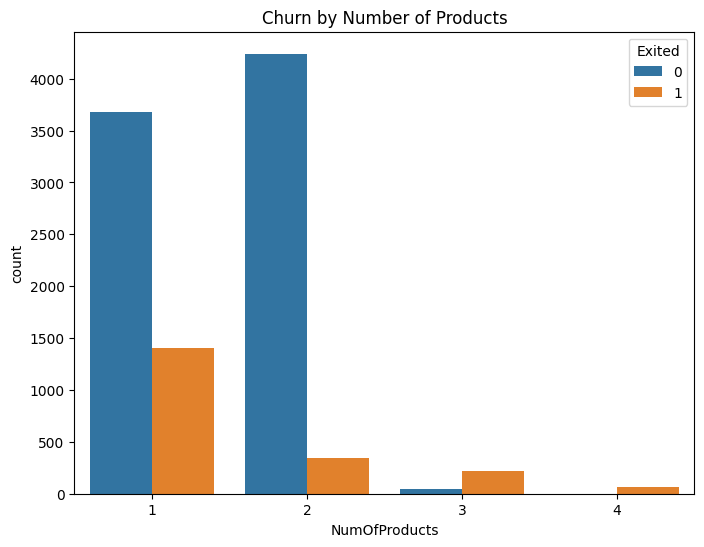

In [24]:
# Churn by Number of Products:

plt.figure(figsize=(8, 6))
sns.countplot(x='NumOfProducts', hue='Exited', data=df)
plt.title('Churn by Number of Products')
plt.show()

In [25]:
churn_rate_NumOfProducts = df.groupby('NumOfProducts')['Exited'].mean()
print(churn_rate_NumOfProducts)

NumOfProducts
1    0.277144
2    0.076035
3    0.827068
4    1.000000
Name: Exited, dtype: float64


The number of products held by customers can impact churn. Customers with fewer products may be less likely to churn, while those with more products may have a higher churn rate.

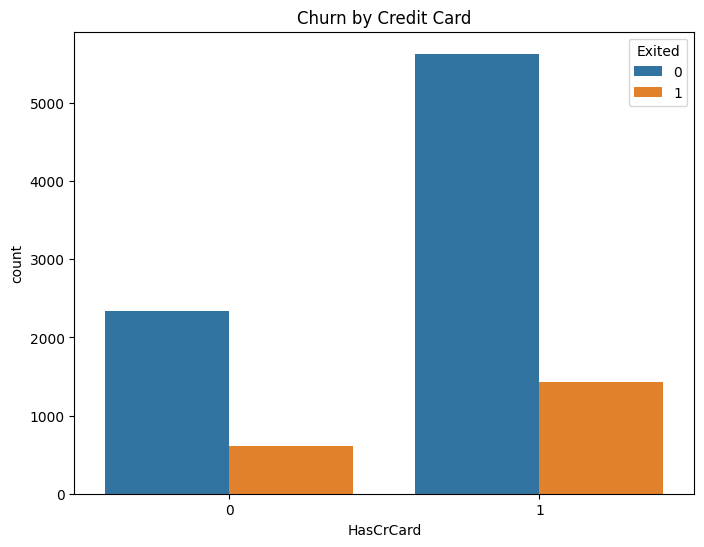

In [26]:
# Churn by Credit Card

plt.figure(figsize=(8, 6))
sns.countplot(x='HasCrCard', hue='Exited', data=df)
plt.title('Churn by Credit Card')
plt.show()

In [27]:
churn_rate_HasCrCard = df.groupby('HasCrCard')['Exited'].mean()
print(churn_rate_HasCrCard)

HasCrCard
0    0.208149
1    0.201984
Name: Exited, dtype: float64


Having a credit card does not seem to have a significant impact on customer churn. The churn rate appears similar for customers with and without a credit card.

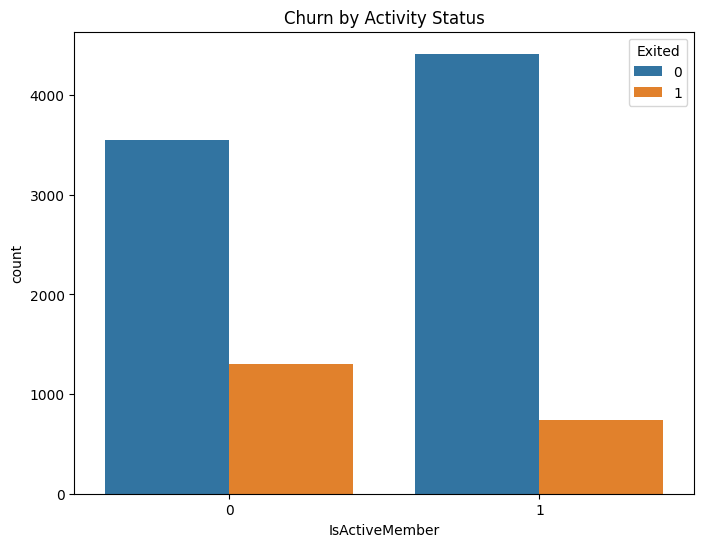

In [28]:
# Churn by Activity Status

plt.figure(figsize=(8, 6))
sns.countplot(x='IsActiveMember', hue='Exited', data=df)
plt.title('Churn by Activity Status')
plt.show()

In [29]:
churn_rate_IsActiveMember = df.groupby('IsActiveMember')['Exited'].mean()
print(churn_rate_IsActiveMember)

IsActiveMember
0    0.268715
1    0.142691
Name: Exited, dtype: float64


Customer activity status is another important factor. Active members appear to have a lower churn rate compared to inactive members.

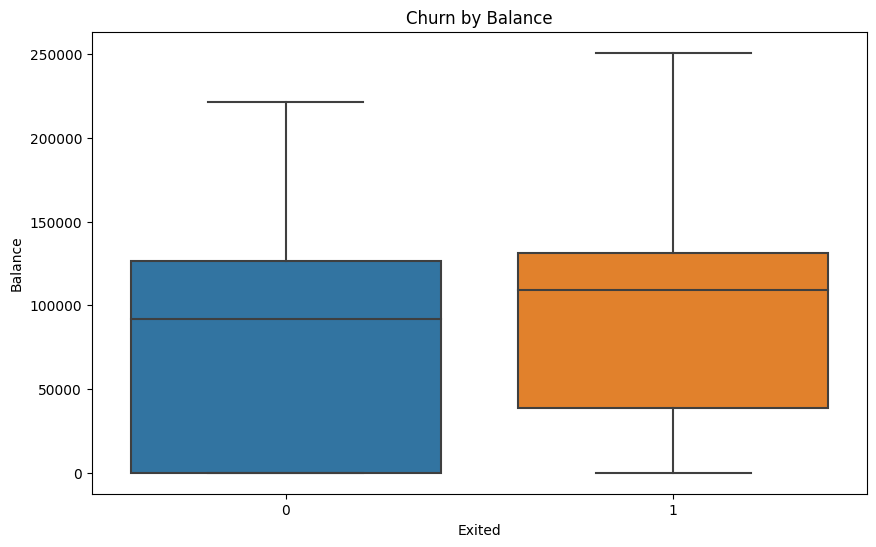

In [30]:
# Churn by Balance:

plt.figure(figsize=(10, 6))
sns.boxplot(x='Exited', y='Balance', data=df)
plt.title('Churn by Balance')
plt.show()

In [31]:
df.corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.026771,-0.027048,-0.012599,0.000077
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285296,0.283530,-0.000876,0.002222
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.013656,-0.013047,0.008663,-0.010196
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118577,0.119124,-0.002588,0.014608
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047611,-0.046357,-0.011394,-0.015330
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.006976,-0.007095,-0.000212,-0.011041
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156356,-0.154741,0.010236,-0.004983
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012490,0.012494,-0.013747,-0.001515
Exited,-0.026771,0.285296,-0.013656,0.118577,-0.047611,-0.006976,-0.156356,0.012490,1.000000,0.995693,-0.005849,-0.004628
Complain,-0.027048,0.283530,-0.013047,0.119124,-0.046357,-0.007095,-0.154741,0.012494,0.995693,1.000000,-0.004799,-0.002893


<Axes: >

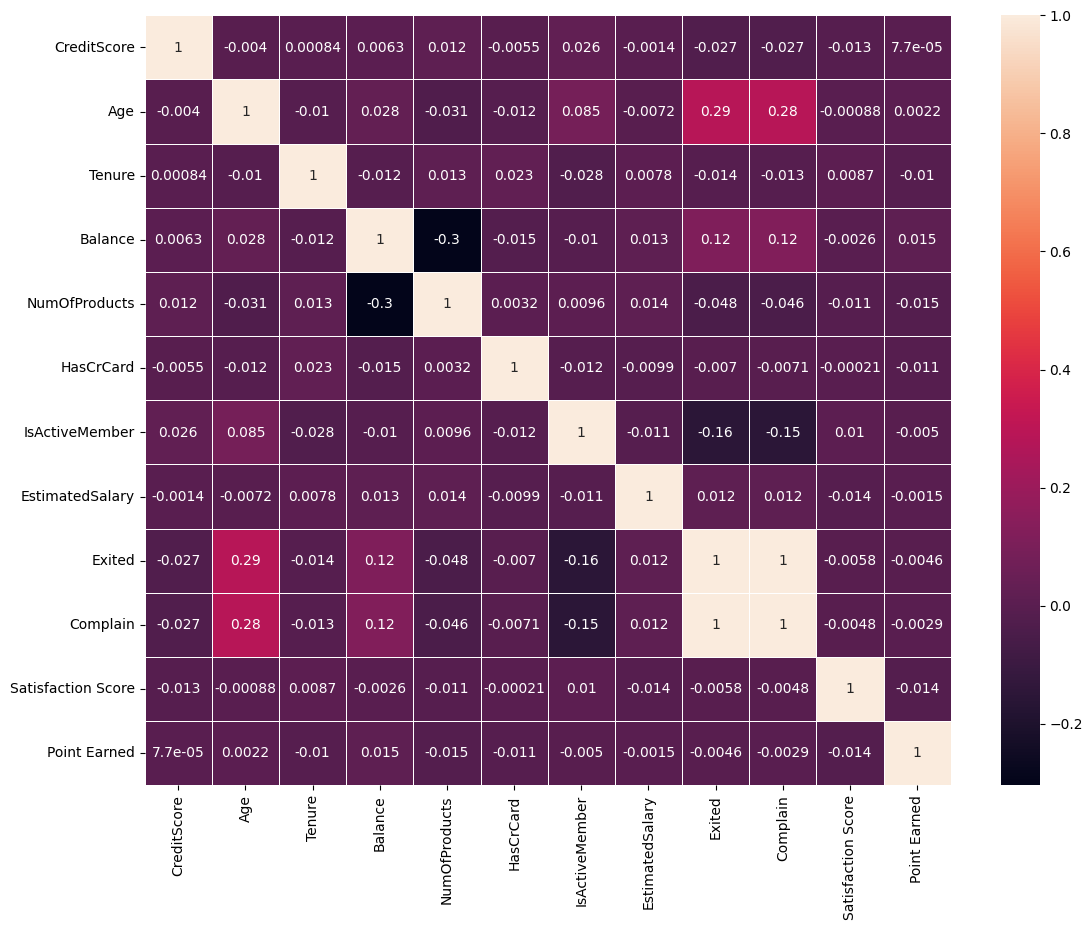

In [32]:
fig,ax = plt.subplots(figsize=(13,10))
sns.heatmap(df.corr(),annot=True,linewidths=0.5,ax=ax)

#5. Scaling Data

In [33]:
geo=LabelEncoder()
gen=LabelEncoder()
ca=LabelEncoder()

df['Geography']=geo.fit_transform(df['Geography'])
df['Gender']=gen.fit_transform(df['Gender'])
df['Card Type']=ca.fit_transform(df['Card Type'])

In [34]:
X=df.drop(['Exited','AgeGroup'],axis=1)
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Card Type,Point Earned
0,619,0,0,42,2,0.00,1,1,1,101348.88,1,2,0,464
1,608,2,0,41,1,83807.86,1,0,1,112542.58,1,3,0,456
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1,3,0,377
3,699,0,0,39,1,0.00,2,0,0,93826.63,0,5,1,350
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0,5,1,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0,1,0,300
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0,5,2,771
9997,709,0,0,36,7,0.00,1,0,1,42085.58,1,3,3,564
9998,772,1,1,42,3,75075.31,2,1,0,92888.52,1,2,1,339


In [35]:
y=df['Exited']
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [36]:
mm=MinMaxScaler()
X_sc=mm.fit_transform(X)
X_sc

array([[0.538     , 0.        , 0.        , ..., 0.25      , 0.        ,
        0.39160045],
       [0.516     , 1.        , 0.        , ..., 0.5       , 0.        ,
        0.38251986],
       [0.304     , 0.        , 0.        , ..., 0.5       , 0.        ,
        0.29284904],
       ...,
       [0.718     , 0.        , 0.        , ..., 0.5       , 1.        ,
        0.50510783],
       [0.844     , 0.5       , 1.        , ..., 0.25      , 0.33333333,
        0.24971623],
       [0.884     , 0.        , 0.        , ..., 0.5       , 0.        ,
        0.89897843]])

#6. Spliting Data into Training and Test Set

In [37]:
X_train,X_test,y_train,y_test=train_test_split(X_sc,y,test_size=0.3,random_state=1)

#7. Model Training and Check Accuracy Score, Print Classification Report and ConfusionMatrixDisplay

(i)KNeighbors Classifier

99.83333333333333
              precision    recall  f1-score   support

           0     0.9992    0.9987    0.9989      2373
           1     0.9952    0.9968    0.9960       627

    accuracy                         0.9983      3000
   macro avg     0.9972    0.9978    0.9975      3000
weighted avg     0.9983    0.9983    0.9983      3000



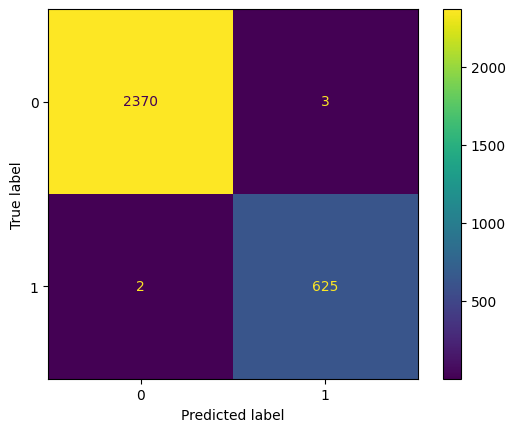

In [38]:
knn=KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train,y_train)
y_pred_knn=knn.predict(X_test)
print(accuracy_score(y_test,y_pred_knn)*100)
print(classification_report(y_test,y_pred_knn,digits=4))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_knn))

(ii)Support Vector Classifier(SVC)

99.83333333333333
              precision    recall  f1-score   support

           0     0.9992    0.9987    0.9989      2373
           1     0.9952    0.9968    0.9960       627

    accuracy                         0.9983      3000
   macro avg     0.9972    0.9978    0.9975      3000
weighted avg     0.9983    0.9983    0.9983      3000



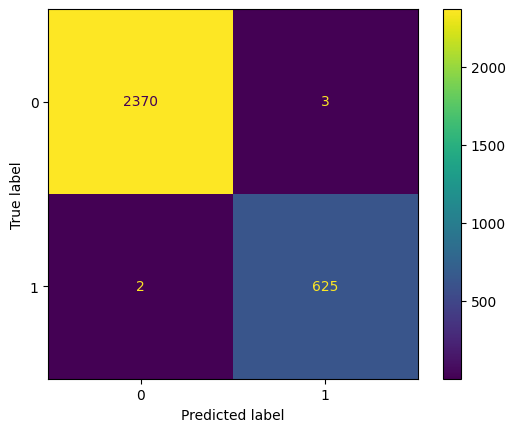

In [39]:
sv=SVC(kernel='poly')
sv.fit(X_train,y_train)
y_pred_sv=sv.predict(X_test)
print(accuracy_score(y_test,y_pred_sv)*100)
print(classification_report(y_test,y_pred_sv,digits=4))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_sv))

(iii)GaussianNB Classification

99.83333333333333
              precision    recall  f1-score   support

           0     0.9992    0.9987    0.9989      2373
           1     0.9952    0.9968    0.9960       627

    accuracy                         0.9983      3000
   macro avg     0.9972    0.9978    0.9975      3000
weighted avg     0.9983    0.9983    0.9983      3000



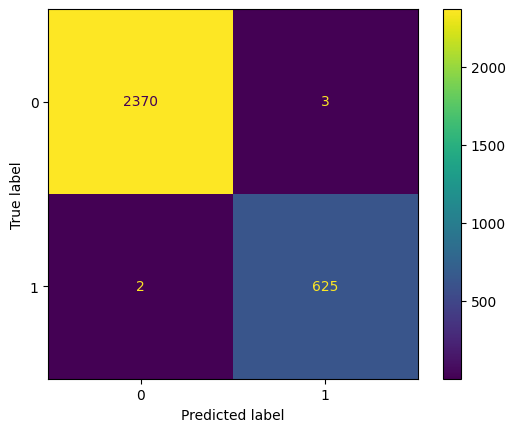

In [40]:
nb=GaussianNB()
nb.fit(X_train,y_train)
y_pred_nb=nb.predict(X_test)
print(accuracy_score(y_test,y_pred_nb)*100)
print(classification_report(y_test,y_pred_nb,digits=4))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_nb))

(iv)Decision Tree Classifier

99.76666666666667
              precision    recall  f1-score   support

           0     0.9983    0.9987    0.9985      2373
           1     0.9952    0.9936    0.9944       627

    accuracy                         0.9977      3000
   macro avg     0.9968    0.9962    0.9965      3000
weighted avg     0.9977    0.9977    0.9977      3000



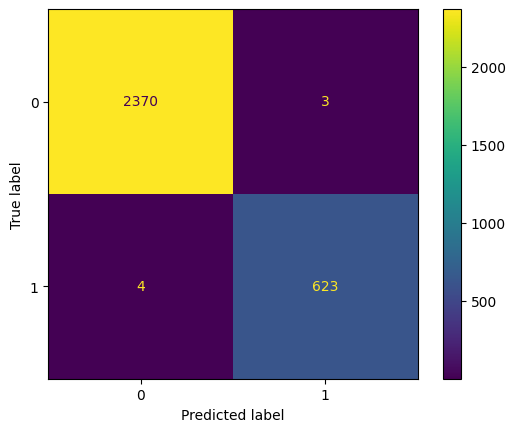

In [41]:
clf=DecisionTreeClassifier(criterion='gini')
clf.fit(X_train,y_train)
y_pred_clf=clf.predict(X_test)
print(accuracy_score(y_test,y_pred_clf)*100)
print(classification_report(y_test,y_pred_clf,digits=4))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_clf))

(v)Random Forest Classifier

99.83333333333333
              precision    recall  f1-score   support

           0     0.9992    0.9987    0.9989      2373
           1     0.9952    0.9968    0.9960       627

    accuracy                         0.9983      3000
   macro avg     0.9972    0.9978    0.9975      3000
weighted avg     0.9983    0.9983    0.9983      3000



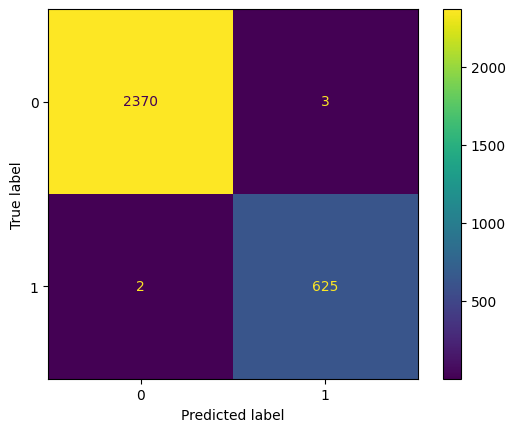

In [42]:
rf=RandomForestClassifier(n_estimators=50,random_state=1)
rf.fit(X_train,y_train)
y_pred_rf=rf.predict(X_test)
print(accuracy_score(y_test,y_pred_rf)*100)
print(classification_report(y_test,y_pred_rf,digits=4))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_rf))

(vi)AdaBoost Classifier

99.83333333333333
              precision    recall  f1-score   support

           0     0.9992    0.9987    0.9989      2373
           1     0.9952    0.9968    0.9960       627

    accuracy                         0.9983      3000
   macro avg     0.9972    0.9978    0.9975      3000
weighted avg     0.9983    0.9983    0.9983      3000



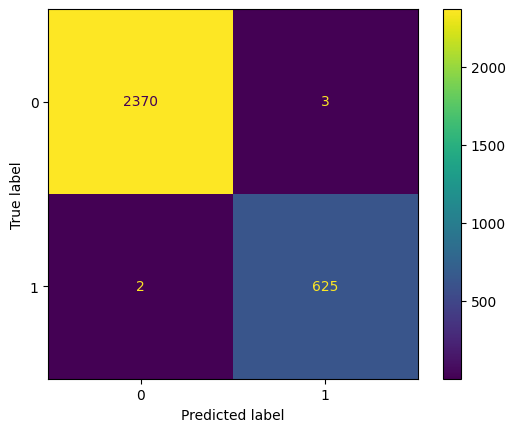

In [43]:
ab=AdaBoostClassifier(random_state=1)
ab.fit(X_train,y_train)
y_pred_ab=ab.predict(X_test)
print(accuracy_score(y_test,y_pred_ab)*100)
print(classification_report(y_test,y_pred_ab,digits=4))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_ab))

(vii)LGBMClassifier

99.83333333333333
              precision    recall  f1-score   support

           0     0.9992    0.9987    0.9989      2373
           1     0.9952    0.9968    0.9960       627

    accuracy                         0.9983      3000
   macro avg     0.9972    0.9978    0.9975      3000
weighted avg     0.9983    0.9983    0.9983      3000



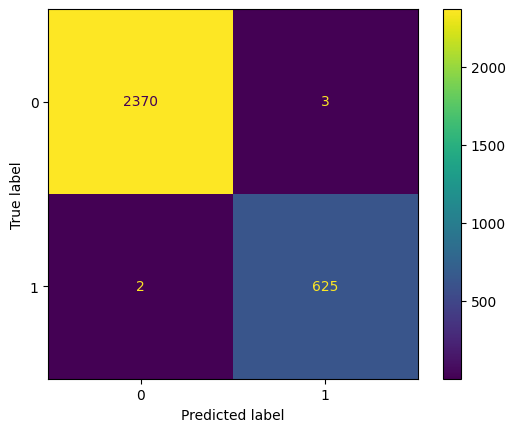

In [44]:
lgbm=LGBMClassifier()
lgbm.fit(X_train,y_train)
y_pred_lgbm=lgbm.predict(X_test)
print(accuracy_score(y_test,y_pred_lgbm)*100)
print(classification_report(y_test,y_pred_lgbm,digits=4))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_lgbm))

In [45]:
y.value_counts()

0    7962
1    2038
Name: Exited, dtype: int64

Here, we can see that accuracy of the dataset is pretty good but this is an imbalanced data set. So the chance of false prediction in the class with lower value counts is high.

Inorder to rectify that problem, we use the oversampling method.

#8. Balance Dataset - Over Sampling

In [46]:
os=SMOTE(random_state=1)
X_os,y_os=os.fit_resample(X,y)

In [47]:
y_os.value_counts()

1    7962
0    7962
Name: Exited, dtype: int64

In [48]:
mm=MinMaxScaler()
X_sc1=mm.fit_transform(X_os)
X_sc1

array([[0.538     , 0.        , 0.        , ..., 0.25      , 0.        ,
        0.39160045],
       [0.516     , 1.        , 0.        , ..., 0.5       , 0.        ,
        0.38251986],
       [0.304     , 0.        , 0.        , ..., 0.5       , 0.        ,
        0.29284904],
       ...,
       [0.266     , 0.        , 0.        , ..., 0.75      , 0.33333333,
        0.3984109 ],
       [0.538     , 0.5       , 1.        , ..., 0.5       , 1.        ,
        0.30079455],
       [0.67      , 0.5       , 0.        , ..., 0.        , 1.        ,
        0.54143019]])

In [49]:
X_train,X_test,y_train,y_test=train_test_split(X_sc1,y_os,test_size=0.3,random_state=1)

In [50]:
knn_os=KNeighborsClassifier(n_neighbors=11)
sv_os=SVC(kernel='poly')
nb_os=GaussianNB()
clf_os=DecisionTreeClassifier(criterion='gini')
rf_os=RandomForestClassifier(n_estimators=50,random_state=1)
ab_os=AdaBoostClassifier(random_state=1)
lgbm_os=LGBMClassifier()

In [51]:
models=[knn_os,sv_os,nb_os,clf_os,rf_os,ab_os,lgbm_os]
for model in models:
  print('**********',model,'**********')
  model.fit(X_train,y_train)
  y_pred_model=model.predict(X_test)
  print(accuracy_score(y_test,y_pred_model)*100)
  print(classification_report(y_test,y_pred_model,digits=4))

********** KNeighborsClassifier(n_neighbors=11) **********
99.7697781498535
              precision    recall  f1-score   support

           0     0.9970    0.9983    0.9977      2365
           1     0.9983    0.9971    0.9977      2413

    accuracy                         0.9977      4778
   macro avg     0.9977    0.9977    0.9977      4778
weighted avg     0.9977    0.9977    0.9977      4778

********** SVC(kernel='poly') **********
99.79070740895773
              precision    recall  f1-score   support

           0     0.9975    0.9983    0.9979      2365
           1     0.9983    0.9975    0.9979      2413

    accuracy                         0.9979      4778
   macro avg     0.9979    0.9979    0.9979      4778
weighted avg     0.9979    0.9979    0.9979      4778

********** GaussianNB() **********
99.7697781498535
              precision    recall  f1-score   support

           0     0.9970    0.9983    0.9977      2365
           1     0.9983    0.9971    0.9977      2

#9. Hyper Parameter Tuning

In [52]:
#KNeighbors Classifier
knn1=KNeighborsClassifier()
param1={'n_neighbors':[3,5,7,9,11,13,15],'weights':['uniform', 'distance'],'algorithm':['auto','ball_tree','kd_tree','brute']}
hp_knn1=GridSearchCV(knn1,param1,cv=5,scoring='accuracy')
hp_knn1.fit(X_train,y_train)
hp_knn1.best_params_

{'algorithm': 'auto', 'n_neighbors': 11, 'weights': 'distance'}

In [53]:
#SVC
sv1=SVC()
param2={'kernel':['linear','poly','rbf'],'gamma':['scale','auto']}
hp_sv1=GridSearchCV(sv1,param2,cv=5,scoring='accuracy')
hp_sv1.fit(X_train,y_train)
hp_sv1.best_params_

{'gamma': 'scale', 'kernel': 'poly'}

In [54]:
#DecisionTree Classifier
clf1=DecisionTreeClassifier()
param4={'criterion':['gini','entropy'],'splitter':['best','random']}
hp_clf1=GridSearchCV(clf1,param4,cv=5,scoring='accuracy')
hp_clf1.fit(X_train,y_train)
hp_clf1.best_params_

{'criterion': 'entropy', 'splitter': 'best'}

In [55]:
#RandomForest Classifier
rf1=RandomForestClassifier(random_state=1)
params3={'n_estimators':[40,50,60,70,80,90,100],'criterion':['gini','entropy','log_loss'],'max_depth':[3,4,5,6]}
hp_rf1=GridSearchCV(rf1,params3,cv=5,scoring='accuracy')
hp_rf1.fit(X_train,y_train)
hp_rf1.best_params_

{'criterion': 'gini', 'max_depth': 6, 'n_estimators': 40}

In [56]:
knn2=KNeighborsClassifier(algorithm='auto',n_neighbors=11,weights='distance')
sv2=SVC(gamma='scale',kernel='poly')
clf2=DecisionTreeClassifier(criterion='entropy',splitter='best')
rf2=RandomForestClassifier(n_estimators=40,criterion='gini',max_depth=6,random_state=1)

In [57]:
models=[knn2,sv2,clf2,rf2]
for model in models:
  print('**********',model,'**********')
  model.fit(X_train,y_train)
  y_pred2=model.predict(X_test)
  print(accuracy_score(y_test,y_pred2)*100)
  print(classification_report(y_test,y_pred2,digits=4))

********** KNeighborsClassifier(n_neighbors=11, weights='distance') **********
99.79070740895773
              precision    recall  f1-score   support

           0     0.9975    0.9983    0.9979      2365
           1     0.9983    0.9975    0.9979      2413

    accuracy                         0.9979      4778
   macro avg     0.9979    0.9979    0.9979      4778
weighted avg     0.9979    0.9979    0.9979      4778

********** SVC(kernel='poly') **********
99.79070740895773
              precision    recall  f1-score   support

           0     0.9975    0.9983    0.9979      2365
           1     0.9983    0.9975    0.9979      2413

    accuracy                         0.9979      4778
   macro avg     0.9979    0.9979    0.9979      4778
weighted avg     0.9979    0.9979    0.9979      4778

********** DecisionTreeClassifier(criterion='entropy') **********
99.68606111343658
              precision    recall  f1-score   support

           0     0.9958    0.9979    0.9968      23

#10. Feature Extraction - PCA

In [58]:
pca=PCA(n_components=11)
X_train=pca.fit_transform(X_train)
X_test=pca.transform(X_test)

In [59]:
#KNeighbors Classifier
knn_pca=KNeighborsClassifier(algorithm='auto',n_neighbors=11,weights='distance')
knn_pca.fit(X_train,y_train)
y_pred_knn_pca=knn_pca.predict(X_test)
print(accuracy_score(y_test,y_pred_knn_pca)*100)
print(classification_report(y_test,y_pred_knn_pca,digits=4))

99.7697781498535
              precision    recall  f1-score   support

           0     0.9970    0.9983    0.9977      2365
           1     0.9983    0.9971    0.9977      2413

    accuracy                         0.9977      4778
   macro avg     0.9977    0.9977    0.9977      4778
weighted avg     0.9977    0.9977    0.9977      4778



In [60]:
pca.explained_variance_ratio_

array([0.23851414, 0.13168744, 0.12107151, 0.08473012, 0.08248466,
       0.07076656, 0.06295944, 0.04874617, 0.04274653, 0.03659719,
       0.0328227 ])

In [61]:
#SVC
svc_pca=SVC(gamma='scale',kernel='poly')
svc_pca.fit(X_train,y_train)
y_pred_svc_pca=knn_pca.predict(X_test)
print(accuracy_score(y_test,y_pred_svc_pca)*100)
print(classification_report(y_test,y_pred_svc_pca,digits=4))

99.7697781498535
              precision    recall  f1-score   support

           0     0.9970    0.9983    0.9977      2365
           1     0.9983    0.9971    0.9977      2413

    accuracy                         0.9977      4778
   macro avg     0.9977    0.9977    0.9977      4778
weighted avg     0.9977    0.9977    0.9977      4778



In [62]:
pca.explained_variance_ratio_

array([0.23851414, 0.13168744, 0.12107151, 0.08473012, 0.08248466,
       0.07076656, 0.06295944, 0.04874617, 0.04274653, 0.03659719,
       0.0328227 ])

In [63]:
#Random Forest
rf_pca=RandomForestClassifier(n_estimators=40,random_state=1)
rf_pca.fit(X_train,y_train)
y_pred_rf_pca=knn_pca.predict(X_test)
print(accuracy_score(y_test,y_pred_rf_pca)*100)
print(classification_report(y_test,y_pred_rf_pca,digits=4))

99.7697781498535
              precision    recall  f1-score   support

           0     0.9970    0.9983    0.9977      2365
           1     0.9983    0.9971    0.9977      2413

    accuracy                         0.9977      4778
   macro avg     0.9977    0.9977    0.9977      4778
weighted avg     0.9977    0.9977    0.9977      4778



In [64]:
pca.explained_variance_ratio_

array([0.23851414, 0.13168744, 0.12107151, 0.08473012, 0.08248466,
       0.07076656, 0.06295944, 0.04874617, 0.04274653, 0.03659719,
       0.0328227 ])

#11. Feature Selection

In [65]:
chi2_select=SelectKBest(chi2,k=10)
X_kbest=chi2_select.fit_transform(X_sc1,y_os)
X_kbest.shape

(15924, 10)

In [66]:
selected_features=chi2_select.fit_transform(X_sc1,y_os)
selected_feature_indices=chi2_select.get_support(indices=True)
print('Selected_feature_names:',X_os.columns[selected_feature_indices].tolist())

Selected_feature_names: ['Geography', 'Gender', 'Age', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Complain', 'Satisfaction Score', 'Card Type']


In [69]:
X_os.drop(['CreditScore','Tenure','EstimatedSalary','Point Earned'],axis=1,inplace=True)


In [70]:
X_os

,Geography,Gender,Age,Balance,NumOfProducts,HasCrCard,IsActiveMember,Complain,Satisfaction Score,Card Type
0,0,0,42,0.000000,1,1,1,1,2,0
1,2,0,41,83807.860000,1,0,1,1,3,0
2,0,0,42,159660.800000,3,1,0,1,3,0
3,0,0,39,0.000000,2,0,0,0,5,1
4,2,0,43,125510.820000,1,1,1,0,5,1
...,...,...,...,...,...,...,...,...,...,...
15919,1,1,43,88232.099299,2,1,0,1,2,2
15920,0,0,34,70527.920705,1,0,0,1,5,1
15921,0,0,45,144949.077444,1,1,0,1,4,1
15922,1,1,47,101276.972553,1,0,0,1,3,3


In [84]:
mm2=MinMaxScaler()
X_sc2=mm2.fit_transform(X_os)
X_sc2

array([[0.        , 0.        , 0.32432432, ..., 1.        , 0.25      ,
        0.        ],
       [1.        , 0.        , 0.31081081, ..., 1.        , 0.5       ,
        0.        ],
       [0.        , 0.        , 0.32432432, ..., 1.        , 0.5       ,
        0.        ],
       ...,
       [0.        , 0.        , 0.36486486, ..., 1.        , 0.75      ,
        0.33333333],
       [0.5       , 1.        , 0.39189189, ..., 1.        , 0.5       ,
        1.        ],
       [0.5       , 0.        , 0.17567568, ..., 1.        , 0.        ,
        1.        ]])

In [85]:
X_train,X_test,y_train,y_test=train_test_split(X_sc2,y_os,test_size=0.3,random_state=1)

In [86]:
#KNeighbors Classifier
knn_chi=KNeighborsClassifier(algorithm='auto',n_neighbors=11,weights='distance')
knn_chi.fit(X_train,y_train)
y_pred_knn_chi=knn_chi.predict(X_test)
print(accuracy_score(y_test,y_pred_knn_chi)*100)
print(classification_report(y_test,y_pred_knn_chi,digits=4))

99.7697781498535
              precision    recall  f1-score   support

           0     0.9970    0.9983    0.9977      2365
           1     0.9983    0.9971    0.9977      2413

    accuracy                         0.9977      4778
   macro avg     0.9977    0.9977    0.9977      4778
weighted avg     0.9977    0.9977    0.9977      4778



In [87]:
#SVC
svc_chi=SVC(gamma='scale',kernel='poly')
svc_chi.fit(X_train,y_train)
y_pred_svc_chi=svc_chi.predict(X_test)
print(accuracy_score(y_test,y_pred_svc_chi)*100)
print(classification_report(y_test,y_pred_svc_chi,digits=4))

99.7697781498535
              precision    recall  f1-score   support

           0     0.9970    0.9983    0.9977      2365
           1     0.9983    0.9971    0.9977      2413

    accuracy                         0.9977      4778
   macro avg     0.9977    0.9977    0.9977      4778
weighted avg     0.9977    0.9977    0.9977      4778



In [88]:
#Random Forest Classifier
rf_chi=RandomForestClassifier(n_estimators=40,random_state=1)
rf_chi.fit(X_train,y_train)
y_pred_rf_chi=rf_chi.predict(X_test)
print(accuracy_score(y_test,y_pred_rf_chi)*100)
print(classification_report(y_test,y_pred_rf_chi,digits=4))

99.79070740895773
              precision    recall  f1-score   support

           0     0.9975    0.9983    0.9979      2365
           1     0.9983    0.9975    0.9979      2413

    accuracy                         0.9979      4778
   macro avg     0.9979    0.9979    0.9979      4778
weighted avg     0.9979    0.9979    0.9979      4778



#**Conclusion** - The most accurate model is using KNeighbors Classifier, SVC and Random Forest Classifier after Feature Selection.

#New Prediction

In [89]:
data={'Geography':['France'],'Gender':['Female'],'Age':[42],'Balance':[0.00],'NumOfProducts':[1],'HasCrCard':[1],'IsActiveMember':[1],'Complain':[1],'Satisfaction Score':[2],'Card Type':['Diamond']}
df_pred=pd.DataFrame(data)
df_pred['Geography'] = geo.fit_transform(df_pred['Geography'])
df_pred['Gender'] = gen.fit_transform(df_pred['Gender'])
df_pred['Card Type'] = ca.fit_transform(df_pred['Card Type'])

(i) Prediction using KNeighbors Classifier

In [90]:
y_new=knn_chi.predict(mm2.transform(df_pred))
if y_new==0:
  print('The customer will Stay')
else:
  print('The Customer Exited')

The Customer Exited


(ii) Prediction using SVC

In [91]:
y_new=svc_chi.predict(mm2.transform(df_pred))
if y_new==0:
  print('The customer will Stay')
else:
  print('The Customer Exited')

The Customer Exited


(iii) Prediction using Random Forest Classifier

In [92]:
y_new=rf_chi.predict(mm2.transform(df_pred))
if y_new==0:
  print('The customer will Stay')
else:
  print('The Customer Exited')

The Customer Exited


#Saving Model

In [93]:
import pickle

In [94]:
#saving the model
pickle.dump(svc_chi,open('model.sav','wb'))
#saving objects
objects=[geo,gen,ca,mm]
pickle.dump(objects,open('objects.sav','wb'))

In [95]:
#loading
model=pickle.load(open('model.sav','rb'))
objects1=pickle.load(open('objects.sav','rb'))
objects1

[LabelEncoder(), LabelEncoder(), LabelEncoder(), MinMaxScaler()]